# Python-based visualisation and analysis of London Airbnb listing data

## 1 Introduction
   1. Download data in Inside Airbnb web site and cleaning the data.
   2. Visualisation and analysis of cleaned data to explore the patterns hidden behind the mass of data.
   3. A clustering algorithm was used to cluster all the Airbnb listings data, and based on the results of the clustering analysis, these listings were broadly classified in order to provide a general summary of all the data.

The above analysis allows us to understand the basic characteristics of the Airbnb listings on the market and the distribution of properties to help us to choose a preferred room.

## 2 Applied technologies
1) Python Data Analysis Techniques
   - Numpy
   - Matplotlib
   - Pandas
2) K-means clustering algorithm

## 3 Data collection and cleaning
### 3.1 Data collection
Download Airbnb listings data from Inside Airbnb web site for London.

### 3.2 Data cleaning

In [1]:
import os
import pandas as pd
import geopandas as gpd
import re
import string
import unicodedata
import seaborn as sns

In [2]:
# Define the filename
filename = "data/London_listings.csv"
# Define columns' names
cols = ['id','name','price','description','host_id','host_listings_count',
        'latitude','longitude','property_type','room_type','accommodates',
        'bathrooms_text','bedrooms','beds','amenities','host_is_superhost',
        'availability_30','availability_60','availability_90','availability_365']
# Read the data
df = pd.read_csv(filename, usecols=cols, low_memory=False)
# Check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67903 entries, 0 to 67902
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67903 non-null  int64  
 1   name                 67879 non-null  object 
 2   description          65388 non-null  object 
 3   host_id              67903 non-null  int64  
 4   host_is_superhost    67871 non-null  object 
 5   host_listings_count  67871 non-null  float64
 6   latitude             67903 non-null  float64
 7   longitude            67903 non-null  float64
 8   property_type        67903 non-null  object 
 9   room_type            67903 non-null  object 
 10  accommodates         67903 non-null  int64  
 11  bathrooms_text       67715 non-null  object 
 12  bedrooms             63645 non-null  float64
 13  beds                 67056 non-null  float64
 14  amenities            67903 non-null  object 
 15  price                67903 non-null 

In [3]:
# remove "$"
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
# remove NA
df.dropna()
print(df.shape)

(67903, 20)


<ipython-input-3-ac743bff259c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)


In [4]:
# write and save csv file
df.to_csv("data/London_listing_tidy.csv", encoding='utf-8',index=False)

## 4 Visualisation analysis
### 4.1 Wordcloud

In [5]:
!pip install wordcloud
import nltk
from imageio import imread
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem.wordnet import WordNetLemmatizer 
from IPython.display import display_markdown
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
def as_markdown(head='', body='Some body text'):
    if head != '':
        display_markdown(f"##### {head}\n\n>{body}\n", raw=True)
    else:
        display_markdown(f">{body}\n", raw=True)

In [7]:
# Define the base parameters
filename = "data/London_listing_tidy.csv"
backpicture = "resources/house1.jpg"

In [8]:
# Read datafile
comment_text = open(filename,encoding="utf-8").read()
# Read backgroud picture
color_mask = imread(backpicture) 

In [9]:
# Lower case
lower = [x.lower() for x in comment_text.split("\n") if not re.match("^\s*$", x)]

for l in lower[0:2]:
    as_markdown("Listing", l)

##### Listing

>id,name,description,host_id,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_30,availability_60,availability_90,availability_365


##### Listing

>13913,holiday london db room let-on going,"my bright double bedroom with a large window has a relaxed feeling! it comfortably fits one or two and is centrally located just two blocks from finsbury park. enjoy great restaurants in the area and easy access to easy transport tubes, trains and buses. babies and children of all ages are welcome.<br /><br /><b>the space</b><br />hello everyone,<br /><br />i'm offering my lovely double bedroom in finsbury park area (zone 2) for let in a shared apartment. <br />you will share the apartment with me and it is fully furnished with a self catering kitchen. two people can easily sleep well as the room has a queen size bed. i also have a travel cot for a baby for guest with small children. <br /><br />i will require a deposit up front as a security gesture on both our parts and will be given back to you when you return the keys. <br /><br />i trust anyone who will be responding to this add would treat my home with care and respect . <br /><br />best wishes <br /><br />alina<br /><br /><b>gue",54730,f,3.0,51.56861,-0.1127,private room in rental unit,private room,2,1 shared bath,1.0,0.0,"[""pack \u2019n play/travel crib"", ""smoke alarm"", ""heating"", ""fire extinguisher"", ""free parking on premises"", ""dryer"", ""dishes and silverware"", ""iron"", ""stove"", ""long term stays allowed"", ""ethernet connection"", ""building staff"", ""crib"", ""coffee maker"", ""essentials"", ""children\u2019s dinnerware"", ""bed linens"", ""extra pillows and blankets"", ""cooking basics"", ""hair dryer"", ""kitchen"", ""tv with standard cable"", ""bathtub"", ""washer"", ""cable tv"", ""lock on bedroom door"", ""dedicated workspace"", ""children\u2019s books and toys"", ""hangers"", ""free street parking"", ""hot water"", ""wifi"", ""room-darkening shades"", ""paid parking off premises"", ""patio or balcony"", ""babysitter recommendations"", ""carbon monoxide alarm"", ""luggage dropoff allowed"", ""outlet covers"", ""shampoo"", ""oven"", ""refrigerator""]",65.0,5,34,64,339


In [10]:
# Remove HTML
cleaned = []
for l in lower:
    tmp = re.sub(r'(\/[A-Za-z]+\d?|[A-Za-z]+ \/)>','\\1> ', l)
    soup = BeautifulSoup(tmp, "html.parser")
    if not re.match(r'^\s*$',soup.get_text()):
        cleaned.append(soup.get_text())
        
for c in cleaned[0:2]:
    as_markdown("Listing", c)

##### Listing

>id,name,description,host_id,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_30,availability_60,availability_90,availability_365


##### Listing

>13913,holiday london db room let-on going,"my bright double bedroom with a large window has a relaxed feeling! it comfortably fits one or two and is centrally located just two blocks from finsbury park. enjoy great restaurants in the area and easy access to easy transport tubes, trains and buses. babies and children of all ages are welcome.  the space  hello everyone,  i'm offering my lovely double bedroom in finsbury park area (zone 2) for let in a shared apartment.  you will share the apartment with me and it is fully furnished with a self catering kitchen. two people can easily sleep well as the room has a queen size bed. i also have a travel cot for a baby for guest with small children.   i will require a deposit up front as a security gesture on both our parts and will be given back to you when you return the keys.   i trust anyone who will be responding to this add would treat my home with care and respect .   best wishes   alina  gue",54730,f,3.0,51.56861,-0.1127,private room in rental unit,private room,2,1 shared bath,1.0,0.0,"[""pack \u2019n play/travel crib"", ""smoke alarm"", ""heating"", ""fire extinguisher"", ""free parking on premises"", ""dryer"", ""dishes and silverware"", ""iron"", ""stove"", ""long term stays allowed"", ""ethernet connection"", ""building staff"", ""crib"", ""coffee maker"", ""essentials"", ""children\u2019s dinnerware"", ""bed linens"", ""extra pillows and blankets"", ""cooking basics"", ""hair dryer"", ""kitchen"", ""tv with standard cable"", ""bathtub"", ""washer"", ""cable tv"", ""lock on bedroom door"", ""dedicated workspace"", ""children\u2019s books and toys"", ""hangers"", ""free street parking"", ""hot water"", ""wifi"", ""room-darkening shades"", ""paid parking off premises"", ""patio or balcony"", ""babysitter recommendations"", ""carbon monoxide alarm"", ""luggage dropoff allowed"", ""outlet covers"", ""shampoo"", ""oven"", ""refrigerator""]",65.0,5,34,64,339


In [11]:
# Remove Punctuation
pattern = re.compile(r'[,\.!\-><=\(\)\[\]\/&\'\"’;:]+')
punkt   = []
for c in cleaned:
    punkt.append(re.sub(pattern, ' ', c))

for p in punkt[0:2]:
    as_markdown("Listing", p)

##### Listing

>id name description host_id host_is_superhost host_listings_count latitude longitude property_type room_type accommodates bathrooms_text bedrooms beds amenities price availability_30 availability_60 availability_90 availability_365


##### Listing

>13913 holiday london db room let on going my bright double bedroom with a large window has a relaxed feeling  it comfortably fits one or two and is centrally located just two blocks from finsbury park  enjoy great restaurants in the area and easy access to easy transport tubes  trains and buses  babies and children of all ages are welcome   the space  hello everyone   i m offering my lovely double bedroom in finsbury park area  zone 2  for let in a shared apartment   you will share the apartment with me and it is fully furnished with a self catering kitchen  two people can easily sleep well as the room has a queen size bed  i also have a travel cot for a baby for guest with small children    i will require a deposit up front as a security gesture on both our parts and will be given back to you when you return the keys    i trust anyone who will be responding to this add would treat my home with care and respect     best wishes   alina  gue 54730 f 3 0 51 56861 0 1127 private room in rental unit private room 2 1 shared bath 1 0 0 0 pack \u2019n play travel crib   smoke alarm   heating   fire extinguisher   free parking on premises   dryer   dishes and silverware   iron   stove   long term stays allowed   ethernet connection   building staff   crib   coffee maker   essentials   children\u2019s dinnerware   bed linens   extra pillows and blankets   cooking basics   hair dryer   kitchen   tv with standard cable   bathtub   washer   cable tv   lock on bedroom door   dedicated workspace   children\u2019s books and toys   hangers   free street parking   hot water   wifi   room darkening shades   paid parking off premises   patio or balcony   babysitter recommendations   carbon monoxide alarm   luggage dropoff allowed   outlet covers   shampoo   oven   refrigerator 65 0 5 34 64 339


In [12]:
# Remove stopwords
stopword_list = set(stopwords.words('english'))
stopped = []
for p in punkt:
    stopped.append(' '.join([x for x in re.split(r'\s+', p) if x not in stopword_list]))
    
for s in stopped[0:2]:
    as_markdown("Listing", s)

##### Listing

>id name description host_id host_is_superhost host_listings_count latitude longitude property_type room_type accommodates bathrooms_text bedrooms beds amenities price availability_30 availability_60 availability_90 availability_365


##### Listing

>13913 holiday london db room let going bright double bedroom large window relaxed feeling comfortably fits one two centrally located two blocks finsbury park enjoy great restaurants area easy access easy transport tubes trains buses babies children ages welcome space hello everyone offering lovely double bedroom finsbury park area zone 2 let shared apartment share apartment fully furnished self catering kitchen two people easily sleep well room queen size bed also travel cot baby guest small children require deposit front security gesture parts given back return keys trust anyone responding add would treat home care respect best wishes alina gue 54730 f 3 0 51 56861 0 1127 private room rental unit private room 2 1 shared bath 1 0 0 0 pack \u2019n play travel crib smoke alarm heating fire extinguisher free parking premises dryer dishes silverware iron stove long term stays allowed ethernet connection building staff crib coffee maker essentials children\u2019s dinnerware bed linens extra pillows blankets cooking basics hair dryer kitchen tv standard cable bathtub washer cable tv lock bedroom door dedicated workspace children\u2019s books toys hangers free street parking hot water wifi room darkening shades paid parking premises patio balcony babysitter recommendations carbon monoxide alarm luggage dropoff allowed outlet covers shampoo oven refrigerator 65 0 5 34 64 339


In [13]:
# Lemmatisation
lemmatizer = WordNetLemmatizer()
lemmas = []
for s in stopped:
    lemmas.append(' '.join([lemmatizer.lemmatize(x) for x in s.split(' ')]))
    
for l in lemmas[0:2]:
    as_markdown('Listing',l)

##### Listing

>id name description host_id host_is_superhost host_listings_count latitude longitude property_type room_type accommodates bathrooms_text bedroom bed amenity price availability_30 availability_60 availability_90 availability_365


##### Listing

>13913 holiday london db room let going bright double bedroom large window relaxed feeling comfortably fit one two centrally located two block finsbury park enjoy great restaurant area easy access easy transport tube train bus baby child age welcome space hello everyone offering lovely double bedroom finsbury park area zone 2 let shared apartment share apartment fully furnished self catering kitchen two people easily sleep well room queen size bed also travel cot baby guest small child require deposit front security gesture part given back return key trust anyone responding add would treat home care respect best wish alina gue 54730 f 3 0 51 56861 0 1127 private room rental unit private room 2 1 shared bath 1 0 0 0 pack \u2019n play travel crib smoke alarm heating fire extinguisher free parking premise dryer dish silverware iron stove long term stay allowed ethernet connection building staff crib coffee maker essential children\u2019s dinnerware bed linen extra pillow blanket cooking basic hair dryer kitchen tv standard cable bathtub washer cable tv lock bedroom door dedicated workspace children\u2019s book toy hanger free street parking hot water wifi room darkening shade paid parking premise patio balcony babysitter recommendation carbon monoxide alarm luggage dropoff allowed outlet cover shampoo oven refrigerator 65 0 5 34 64 339


In [14]:
# Sort text data
cut_text = " ".join(lemmas) 

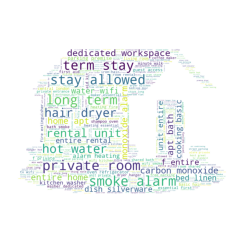

In [15]:
# Set word cloud properties
cloud = WordCloud(
    # Set the color of background
    background_color='white',
    # Set the shape of wordcloud
    mask=color_mask,
    # Max number of words
    max_words=2000,
    # Max size
    max_font_size=60
   )
# Generate the wordcloud
word_cloud = cloud.generate(cut_text) 
# Plot it
plt.imshow(word_cloud)
plt.axis('off') 
plt.show()

In [16]:
# Save the picture
word_cloud.to_file("results/Wordcloud_listings.jpg") 

### 4.2 Distribution of listings

In [17]:
# Read London borough shape
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')

In [18]:
# Convert df to gdf
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [19]:
# Add boroughs name to listings data
gdf_boro = gpd.sjoin(gdf, boros, op='within', how='left')
print(gdf_boro.info())

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67903 entries, 0 to 67902
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   67903 non-null  int64   
 1   name                 67879 non-null  object  
 2   description          65388 non-null  object  
 3   host_id              67903 non-null  int64   
 4   host_is_superhost    67871 non-null  object  
 5   host_listings_count  67871 non-null  float64 
 6   latitude             67903 non-null  float64 
 7   longitude            67903 non-null  float64 
 8   property_type        67903 non-null  object  
 9   room_type            67903 non-null  object  
 10  accommodates         67903 non-null  int64   
 11  bathrooms_text       67715 non-null  object  
 12  bedrooms             63645 non-null  float64 
 13  beds                 67056 non-null  float64 
 14  amenities            67903 non-null  object  
 15  price      

In [20]:
# Convert gdf back to df
df_boro = pd.DataFrame(gdf_boro)
# Drop useless columns
df_boro.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)

In [21]:
df4 = df_boro.rename(columns={'NAME':'boro_name'})#.to_csv("data/London_listing_tidy_boro.csv", 
                                                    #encoding='utf-8',index=False)

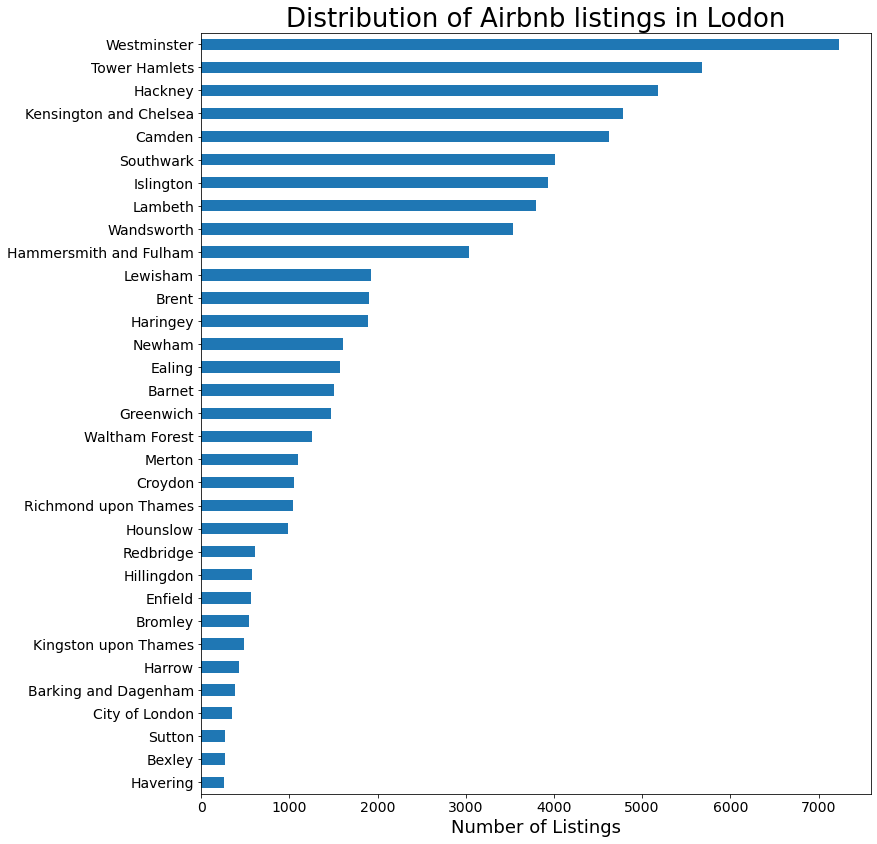

In [22]:
#filename = "data/London_listing_tidy_boro.csv" 
#df4 = pd.read_csv(filename,low_memory=False)
groups_area = df4["id"].groupby(df4["boro_name"])
count_area = groups_area.count()
count_area.index.name = ""

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(111)
ax.set_xlabel("Number of Listings",fontsize=18)
ax.set_title("Distribution of Airbnb listings in Lodon",fontsize=26)
count_area.sort_values().plot(kind="barh",fontsize=14)
plt.savefig("results/Distribution_of_listings_figure.jpg")

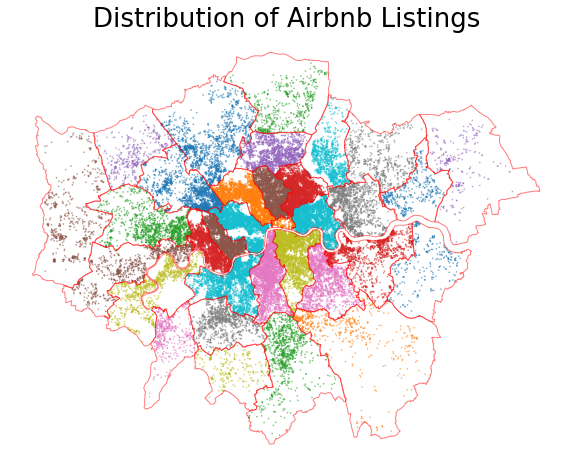

In [23]:
ax = gdf_boro.plot(column='NAME', markersize=0.5, alpha=0.5, figsize=(10,8))
plt.axis('off')
plt.title("Distribution of Airbnb Listings",fontsize=26)
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5)
plt.savefig("results/Distribution_of_listings_map.jpg")

In [24]:
borogrdf = df4.groupby('boro_name').agg({'price':['mean','count']}).reset_index()

In [25]:
borogrdf.columns = borogrdf.columns.get_level_values(1)
borogrdf.head()

,,mean,count
0,Barking and Dagenham,76.228205,390
1,Barnet,132.564495,1504
2,Bexley,67.400735,272
3,Brent,125.370545,1908
4,Bromley,79.121547,543


In [26]:
borogrdf.rename(columns={'':'boro_name', 'count':'listings_count'}, inplace=True)
borogrdf.head()

,boro_name,mean,listings_count
0,Barking and Dagenham,76.228205,390
1,Barnet,132.564495,1504
2,Bexley,67.400735,272
3,Brent,125.370545,1908
4,Bromley,79.121547,543


In [27]:
boro_gdf = borogrdf.set_index('boro_name').join(boros.set_index('NAME'), rsuffix='_r')
boro_gdf.head(3)

,mean,listings_count,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
boro_name,,,,,,,
Barking and Dagenham,76.228205,390,E09000002,3779.934,169.150,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
Barnet,132.564495,1504,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
Bexley,67.400735,272,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."


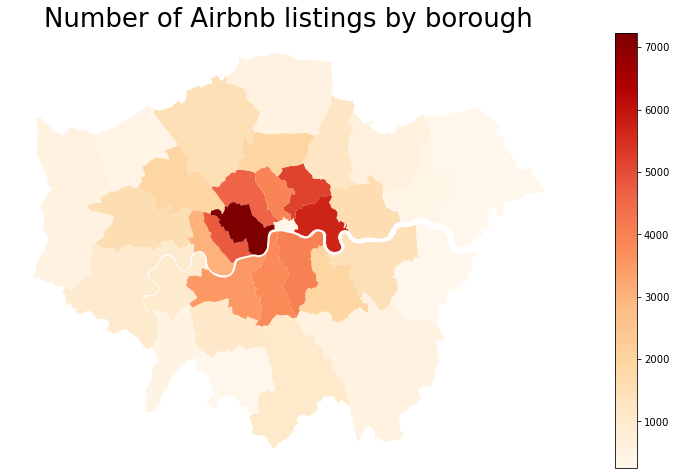

In [28]:
boro_gdf = boro_gdf.set_geometry('geometry')
boro_gdf.plot(column='listings_count', legend=True, figsize=(16,8),cmap="OrRd")
plt.title("Number of Airbnb listings by borough", fontsize=26)
plt.axis('off')
plt.savefig("results/Number_of_listings_map.jpg")
plt.show()

### 4.3 Average price of listings by borough

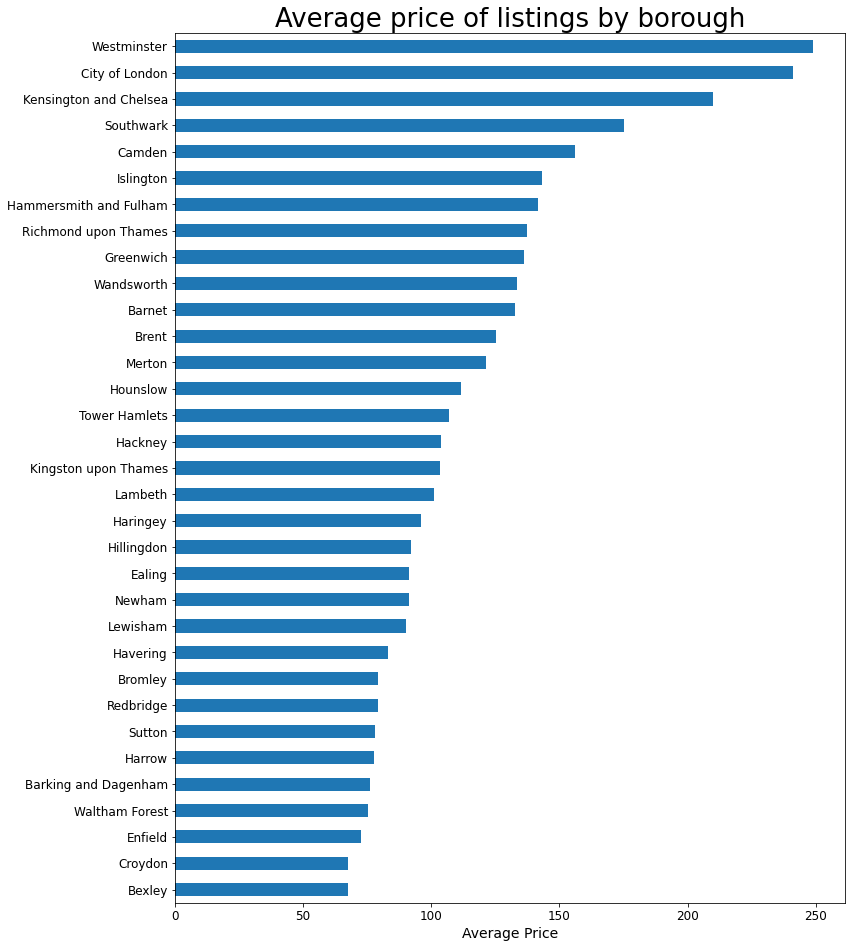

In [29]:
groups_price_area = df4["price"].groupby(df4["boro_name"])
mean_price = groups_price_area.mean()
mean_price.index.name = ""

fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(111)
ax.set_xlabel("Average Price",fontsize=14)
ax.set_title("Average price of listings by borough",fontsize=26)
mean_price.sort_values(ascending=True, inplace=False).plot(kind="barh",fontsize=12)
plt.savefig("results/Price_ave_figure.jpg")

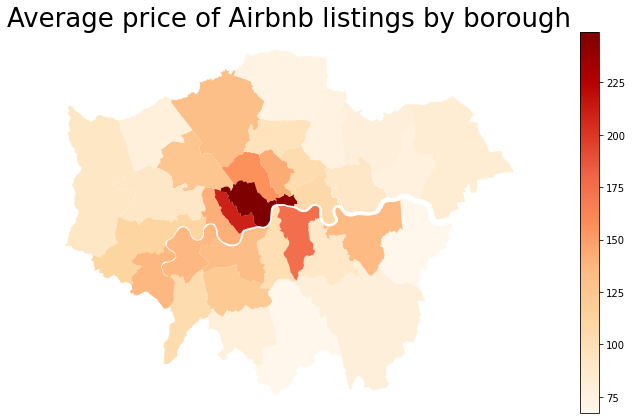

In [30]:
boro_gdf = boro_gdf.set_geometry('geometry')
boro_gdf.plot(column='mean', legend=True, figsize=(16,7),cmap="OrRd")
plt.title("Average price of Airbnb listings by borough", fontsize = 26)
plt.axis('off')
plt.savefig("results/Price_ave_map.jpg")
plt.show()

In [31]:
borogrdf2 = df4.groupby(['boro_name','room_type']).agg({'price':['mean','median']}).reset_index()
borogrdf2.columns = borogrdf2.columns.get_level_values(1)
borogrdf2.rename(columns={'':'boro_name'}, inplace=True)

def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

df_column_uniquify(borogrdf2)
borogrdf2.rename(columns={'boro_name_1':'room_type'}, inplace=True)
borogrdf2.head()


,boro_name,room_type,mean,median
0,Barking and Dagenham,Entire home/apt,114.105263,100.0
1,Barking and Dagenham,Private room,55.521739,38.0
2,Barking and Dagenham,Shared room,126.500000,120.0
3,Barnet,Entire home/apt,133.672256,100.0
4,Barnet,Hotel room,276.777778,440.0


In [32]:
mapping = {}
for b in ['Enfield','Waltham Forest','Redbridge','Barking and Dagenham','Havering','Greenwich','Bexley']:
    mapping[b]='Outer East and North East'
for b in ['Haringey','Islington','Hackney','Tower Hamlets','Newham','Lambeth','Southwark','Lewisham']:
    mapping[b]='Inner East'
for b in ['Bromley','Croydon','Sutton','Merton','Kingston upon Thames']:
    mapping[b]='Outer South'
for b in ['Wandsworth','Kensington and Chelsea','Hammersmith and Fulham','Westminster','Camden']:
    mapping[b]='Inner West'
for b in ['Richmond upon Thames','Hounslow','Ealing','Hillingdon','Brent','Harrow','Barnet','City of London']:
    mapping[b]='Outer West and North West'
print(len(mapping.keys()))

33


In [33]:
boro_data3 = df4.set_index('boro_name').groupby([mapping,'room_type']).agg({'price':['mean','median','count']}).reset_index()
boro_data3.columns = boro_data3.columns.droplevel(0)
cols = boro_data3.columns.values
cols[0]  = 'area'
cols[1]  = 'room_type'
boro_data3.columns = cols
boro_data3

,area,room_type,mean,median,count
0,Inner East,Entire home/apt,145.523862,104.0,14647
1,Inner East,Hotel room,108.705882,103.0,51
2,Inner East,Private room,87.043869,40.0,13130
3,Inner East,Shared room,83.136612,34.0,183
4,Inner West,Entire home/apt,233.059028,150.0,15823
5,Inner West,Hotel room,197.385496,157.0,262
6,Inner West,Private room,96.855156,56.0,6973
7,Inner West,Shared room,73.381944,31.5,144
8,Outer East and North East,Entire home/apt,143.010396,100.0,2020
9,Outer East and North East,Hotel room,81.384615,77.0,26


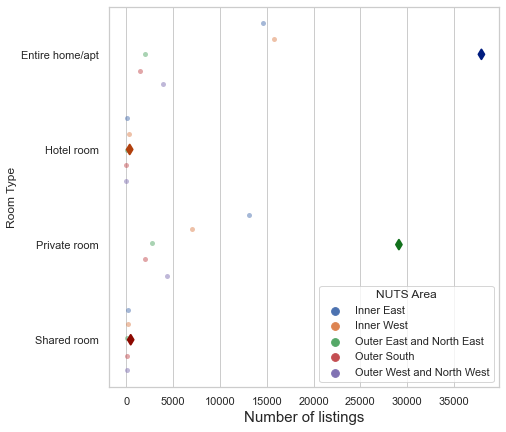

In [34]:
sns.set_theme(style="whitegrid")
#f, ax = plt.subplots()
plt.figure(figsize=(7,7))
sns.despine(bottom=True, left=True)
g = sns.stripplot(x="count", y="room_type", hue="area",
              data=boro_data3, dodge=True,alpha=.5, zorder=1)

g.legend(loc="lower right")
g.legend_.set_title('NUTS Area')
sns.pointplot(x="count", y="room_type",
              data=boro_data3.groupby('room_type').agg('sum').reset_index(), 
              join=False, palette="dark",
              markers="d", scale=1, ci=None)
plt.xlabel('Number of listings',fontsize=15)
plt.ylabel('Room Type')
plt.savefig("results/Number_type_figure.jpg")

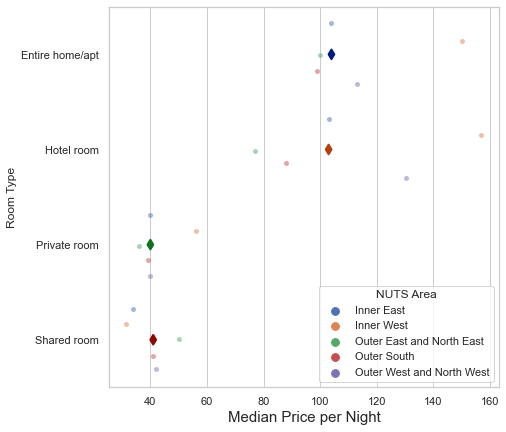

In [35]:
sns.set_theme(style="whitegrid")
#f, ax = plt.subplots()
plt.figure(figsize=(7,7))
sns.despine(bottom=True, left=True)
g = sns.stripplot(x="median", y="room_type", hue="area",
              data=boro_data3, dodge=True, alpha=.5, zorder=1)
g.legend(loc='lower right')
g.legend_.set_title('NUTS Area')
sns.pointplot(x="median", y="room_type",
              data=boro_data3.groupby('room_type').agg('median').reset_index(), 
              join=False, palette="dark",
              markers="d", scale=1, ci=None)
plt.xlabel('Median Price per Night',fontsize=15)
plt.ylabel('Room Type')
plt.savefig("results/Price_med_groupby_figure.jpg")

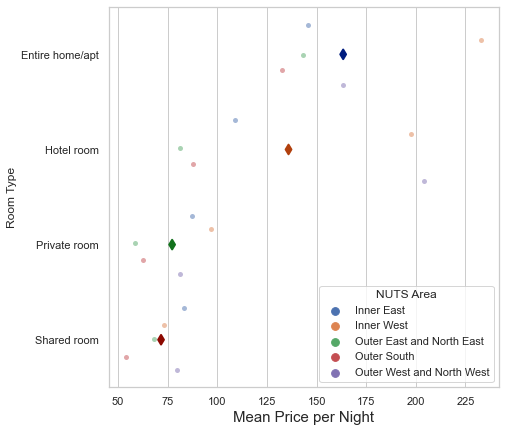

In [36]:
sns.set_theme(style="whitegrid")
#f, ax = plt.subplots()
plt.figure(figsize=(7,7))
sns.despine(bottom=True, left=True)
g = sns.stripplot(x="mean", y="room_type", hue="area",
              data=boro_data3, dodge=True, alpha=.5, zorder=1)
g.legend(loc='lower right')
g.legend_.set_title('NUTS Area')
#g.figure.set_size_inches(8,4)
sns.pointplot(x="mean", y="room_type",
              data=boro_data3.groupby('room_type').agg('mean').reset_index(), 
              join=False, palette="dark",
              markers="d", scale=1, ci=None)
plt.xlabel('Mean Price per Night',fontsize=15)
plt.ylabel('Room Type')
plt.savefig("results/Price_ave_groupby_figure.jpg")

### 4.4 Distribution range of listings' price in each borough

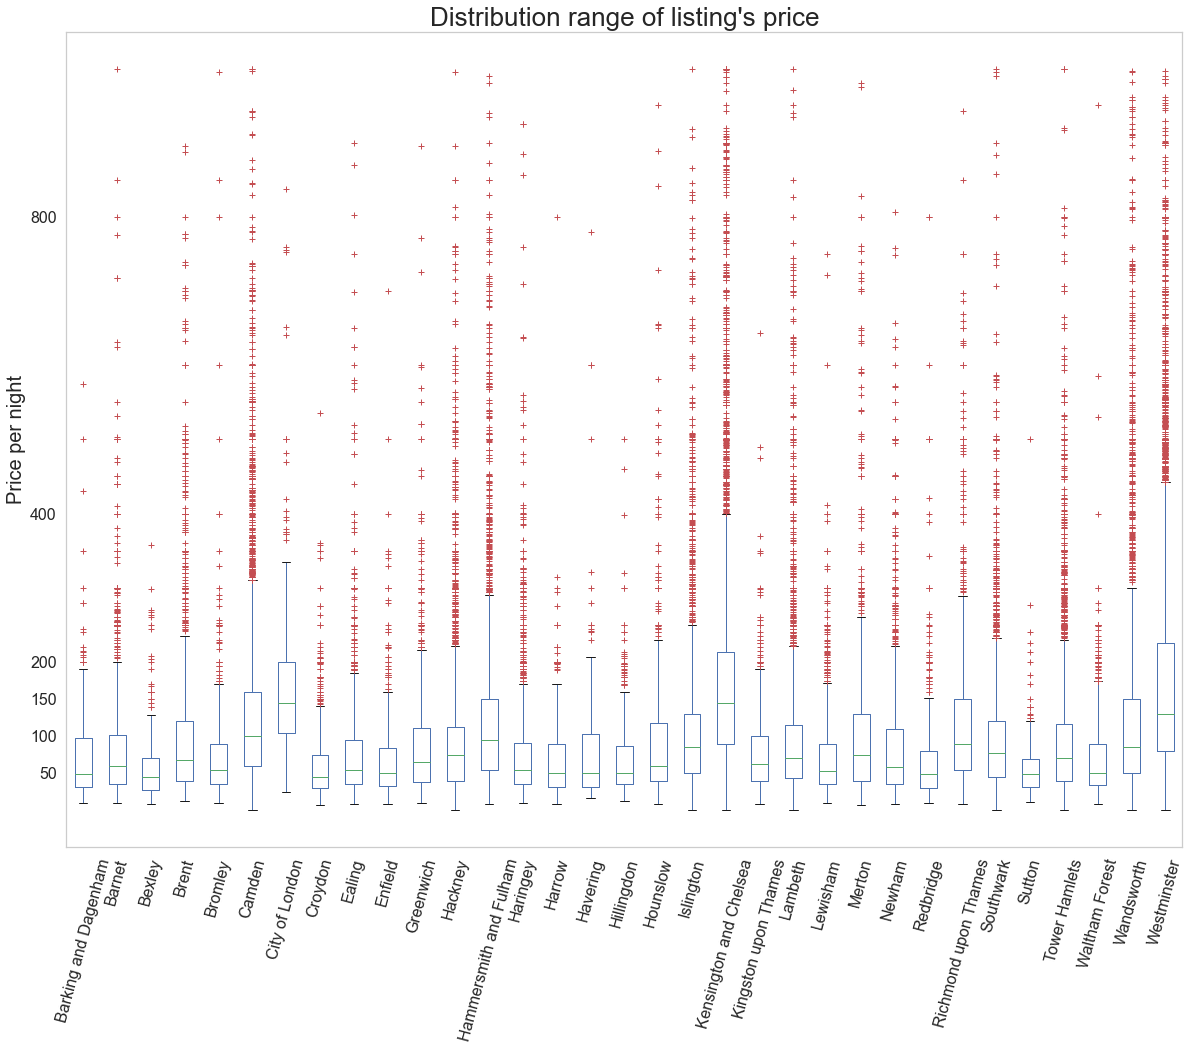

In [37]:
df4 = df4.drop(df4[(df4.price >= 1000)].index)
box_price_area = df4["price"].groupby(df4["boro_name"])
flag = True
box_data = pd.DataFrame(list(range(70000)),columns=["start"])
for name,group in box_price_area:
    box_data[name] = group
del box_data["start"]
box_data.index.name = ""

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_ylabel("Price per night",fontsize=20)
ax.set_title("Distribution range of listing's price",fontsize=26)
box_data.plot(kind="box",fontsize=16,sym='r+',grid=False,ax=ax,yticks=[50,100,150,200,400,800])
plt.xticks(rotation=75)
plt.savefig("results/Price_boxplot.jpg")

### 4.5 Visualisation of the hosts' professionalism

In [38]:
df4['host_is_superhost'] = df4.host_is_superhost.str.replace('t','superhost').astype(str)
df4['host_is_superhost'] = df4.host_is_superhost.str.replace('f','non_superhost').astype(str)
df4.drop(index=(df4[(df4["host_is_superhost"].isin(["nan"]))].index), inplace=True)
count_superhost = df4["host_is_superhost"].value_counts()
count_superhost.name = ""

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


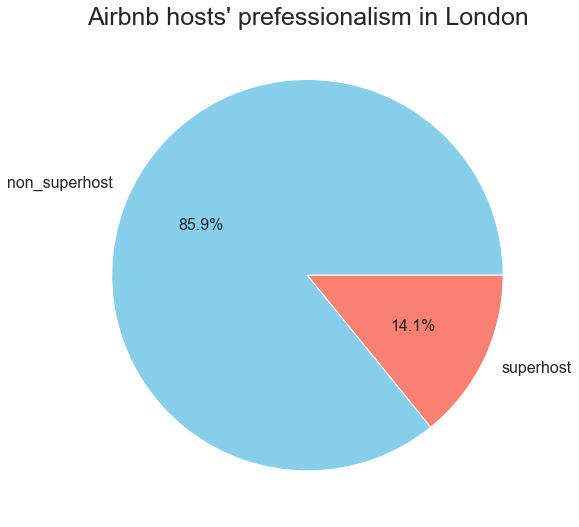

In [39]:
fig = plt.figure(figsize=(9,9))
colors = ['skyblue','salmon']
ax = fig.add_subplot(111)
ax.set_title("Airbnb hosts' prefessionalism in London",fontsize=25)
count_superhost.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
plt.savefig("results/Superhost_pie.jpg")

In [40]:
# Extract top 5 boroughs
Westminster = df4[df4["boro_name"].isin(["Westminster"])].copy()
Tower_Hamlets = df4[df4["boro_name"].isin(["Tower Hamlets"])].copy()
Hackney = df4[df4["boro_name"].isin(["Hackney"])].copy()
Kensington_Chelsea = df4[df4["boro_name"].isin(["Kensington and Chelsea"])].copy()
Camden = df4[df4["boro_name"].isin(["Camden"])].copy()
print(Camden.info())
print(Camden.sample(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 27 to 67880
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   4555 non-null   int64   
 1   name                 4554 non-null   object  
 2   description          4443 non-null   object  
 3   host_id              4555 non-null   int64   
 4   host_is_superhost    4555 non-null   object  
 5   host_listings_count  4555 non-null   float64 
 6   latitude             4555 non-null   float64 
 7   longitude            4555 non-null   float64 
 8   property_type        4555 non-null   object  
 9   room_type            4555 non-null   object  
 10  accommodates         4555 non-null   int64   
 11  bathrooms_text       4550 non-null   object  
 12  bedrooms             4204 non-null   float64 
 13  beds                 4490 non-null   float64 
 14  amenities            4555 non-null   object  
 15  price              

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


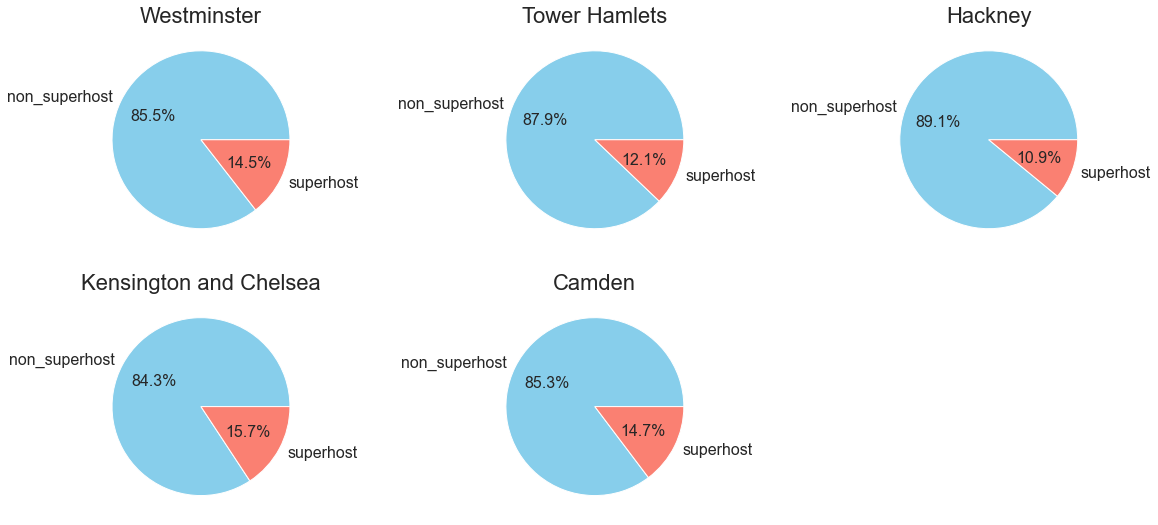

In [41]:
count_superhost_W = Westminster["host_is_superhost"].value_counts()
count_superhost_T = Tower_Hamlets["host_is_superhost"].value_counts()
count_superhost_H = Hackney["host_is_superhost"].value_counts()
count_superhost_K = Kensington_Chelsea["host_is_superhost"].value_counts()
count_superhost_C = Camden["host_is_superhost"].value_counts()
count_superhost_W.name = ""
count_superhost_T.name = ""
count_superhost_H.name = ""
count_superhost_K.name = ""
count_superhost_C.name = ""
fig = plt.figure(figsize=(20,9))
colors = ['skyblue','salmon']
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax1.set_title("Westminster",fontsize=22)
ax2.set_title("Tower Hamlets",fontsize=22)
ax3.set_title("Hackney",fontsize=22)
ax4.set_title("Kensington and Chelsea",fontsize=22)
ax5.set_title("Camden",fontsize=22)
count_superhost_W.plot(kind="pie",ax=ax1,cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
count_superhost_T.plot(kind="pie",ax=ax2,cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
count_superhost_H.plot(kind="pie",ax=ax3,cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
count_superhost_K.plot(kind="pie",ax=ax4,cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
count_superhost_C.plot(kind="pie",ax=ax5,cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=16,colors=colors)
plt.savefig("results/Superhost_top5_pie.jpg")

### 4.6 Visualisation of average occupancy rate

In [42]:
df_ava = df4.drop(df4[(df4.availability_30==0)&(df4.availability_60==0)&
                      (df4.availability_90==0)&(df4.availability_365==0)].index)
print(df_ava.shape)
df_ava.head()

(34753, 23)


,id,name,description,host_id,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,...,beds,amenities,price,availability_30,availability_60,availability_90,availability_365,geometry,boro_name,GSS_CODE
0,13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730,non_superhost,3.0,51.56861,-0.11270,Private room in rental unit,Private room,...,0.0,"[""Pack \u2019n play/Travel crib"", ""Smoke alarm...",65.0,5,34,64,339,POINT (530901.013 187213.787),Islington,E09000019
1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302,non_superhost,1.0,51.48780,-0.16813,Entire rental unit,Entire home/apt,...,1.0,"[""Air conditioning"", ""Heating"", ""Fire extingui...",75.0,0,0,0,2,POINT (527284.576 178129.679),Kensington and Chelsea,E09000020
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,67564,non_superhost,18.0,51.52195,-0.14094,Entire rental unit,Entire home/apt,...,3.0,"[""Smoke alarm"", ""Heating"", ""Dryer"", ""Dishes an...",307.0,11,27,52,320,POINT (529075.790 181974.865),Westminster,E09000033
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,67915,non_superhost,3.0,51.47935,-0.19743,Private room in townhouse,Private room,...,1.0,"[""Hot water"", ""TV"", ""Air conditioning"", ""Smoke...",150.0,29,59,89,364,POINT (525273.544 177139.513),Hammersmith and Fulham,E09000013
4,24328,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...",41759,non_superhost,0.0,51.47119,-0.16256,Entire townhouse,Entire home/apt,...,1.0,"[""Smoke alarm"", ""Heating"", ""Free parking on pr...",200.0,0,0,12,273,POINT (527717.629 176292.280),Wandsworth,E09000032


In [43]:
df_ava_gr_all = df_ava.groupby(['boro_name']).agg({'availability_30':['count','sum'],
                                                   'availability_60':['count','sum'],
                                                   'availability_90':['count','sum'],
                                                   'availability_365':['count','sum']}).reset_index()
df_ava_gr_all = df_ava_gr_all.drop(df_ava_gr_all.columns[[3,5,7]], axis = 1)
df_ava_gr_all.head()

boro_name availability_30        availability_60  \
                                  count    sum             sum   
0  Barking and Dagenham             277   4794           11059   
1                Barnet             902  13847           32363   
2                Bexley             213   3583            8253   
3                 Brent            1038  13437           32269   
4               Bromley             338   4814           10825   

  availability_90 availability_365  
              sum              sum  
0           17727            60626  
1           52710           201918  
2           13372            48345  
3           53821           204482  
4           17596            67235

In [44]:
df_ava_gr_all.columns = df_ava_gr_all.columns.droplevel(0)
cols = df_ava_gr_all.columns.values
cols[0] = 'boro_name'
cols[1] = 'count'
cols[2] = 'sum_30'
cols[3] = 'sum_60'
cols[4] = 'sum_90'
cols[5] = 'sum_365'
df_ava_gr_all.columns = cols
df_ava_gr_all.head()

,boro_name,count,sum_30,sum_60,sum_90,sum_365
0,Barking and Dagenham,277,4794,11059,17727,60626
1,Barnet,902,13847,32363,52710,201918
2,Bexley,213,3583,8253,13372,48345
3,Brent,1038,13437,32269,53821,204482
4,Bromley,338,4814,10825,17596,67235


In [45]:
df_ava_gr_all['Occupancy_rate_30'] = df_ava_gr_all.apply(lambda x: 1-(x['sum_30']/(x['count']*30)), axis=1)
df_ava_gr_all['Occupancy_rate_60'] = df_ava_gr_all.apply(lambda x: 1-(x['sum_60']/(x['count']*60)), axis=1)
df_ava_gr_all['Occupancy_rate_90'] = df_ava_gr_all.apply(lambda x: 1-(x['sum_90']/(x['count']*90)), axis=1)
df_ava_gr_all['Occupancy_rate_365'] = df_ava_gr_all.apply(lambda x: 1-(x['sum_365']/(x['count']*365)), axis=1)
df_ava_gr_all.head()

,boro_name,count,sum_30,sum_60,sum_90,sum_365,Occupancy_rate_30,Occupancy_rate_60,Occupancy_rate_90,Occupancy_rate_365
0,Barking and Dagenham,277,4794,11059,17727,60626,0.423105,0.334597,0.288929,0.400366
1,Barnet,902,13847,32363,52710,201918,0.488285,0.402014,0.350702,0.386696
2,Bexley,213,3583,8253,13372,48345,0.439280,0.354225,0.302452,0.378159
3,Brent,1038,13437,32269,53821,204482,0.568497,0.481872,0.423881,0.460285
4,Bromley,338,4814,10825,17596,67235,0.525247,0.466223,0.421565,0.455013


In [46]:
gdf_ava_gr_all = df_ava_gr_all.set_index('boro_name').join(boros.set_index('NAME'), rsuffix='_r')
gdf_ava_gr_all.head()

,count,sum_30,sum_60,sum_90,sum_365,Occupancy_rate_30,Occupancy_rate_60,Occupancy_rate_90,Occupancy_rate_365,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
boro_name,,,,,,,,,,,,,,
Barking and Dagenham,277,4794,11059,17727,60626,0.423105,0.334597,0.288929,0.400366,E09000002,3779.934,169.150,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
Barnet,902,13847,32363,52710,201918,0.488285,0.402014,0.350702,0.386696,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
Bexley,213,3583,8253,13372,48345,0.439280,0.354225,0.302452,0.378159,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
Brent,1038,13437,32269,53821,204482,0.568497,0.481872,0.423881,0.460285,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
Bromley,338,4814,10825,17596,67235,0.525247,0.466223,0.421565,0.455013,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."


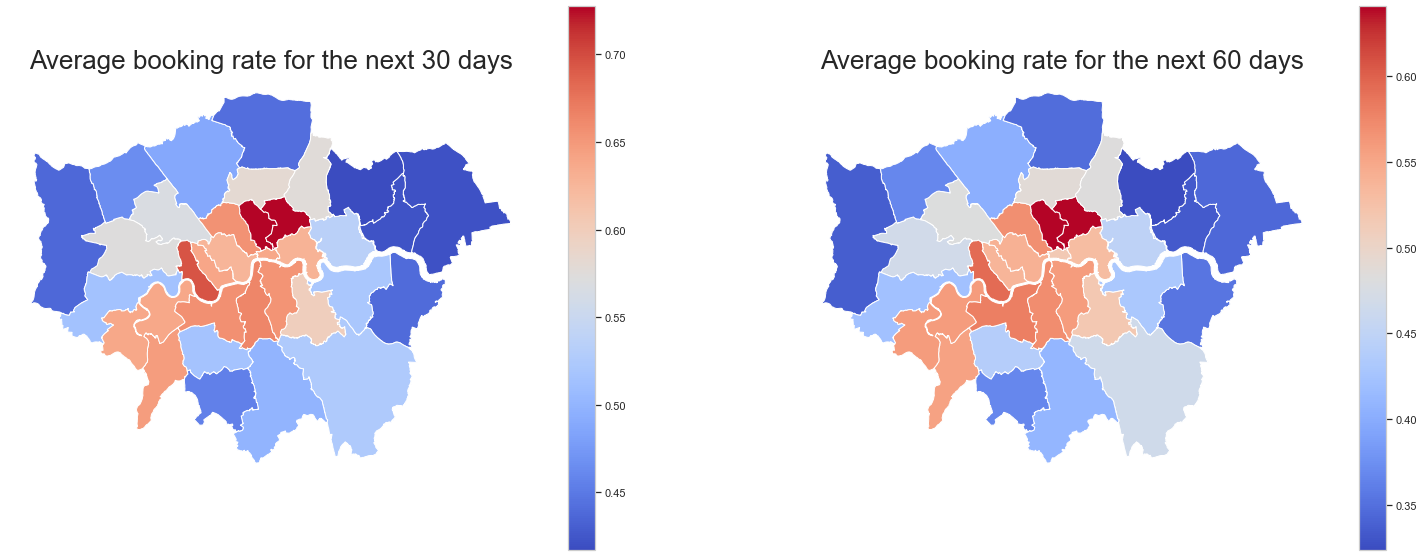

In [47]:
gdf_ava_gr_all = gdf_ava_gr_all.set_geometry('geometry')

f,axes = plt.subplots(1,2,figsize=(26,10))

gdf_ava_gr_all.plot(column='Occupancy_rate_30', ax=axes[0], legend=True, cmap='coolwarm')
gdf_ava_gr_all.copy().plot(column='Occupancy_rate_60', ax=axes[1], legend=True, cmap='coolwarm')

for ax in axes:
    ax.axis('off')

axes[0].set_title('Average booking rate for the next 30 days', size=26)
axes[1].set_title('Average booking rate for the next 60 days', size=26)
plt.savefig("results/Booking_rate_1.jpg")

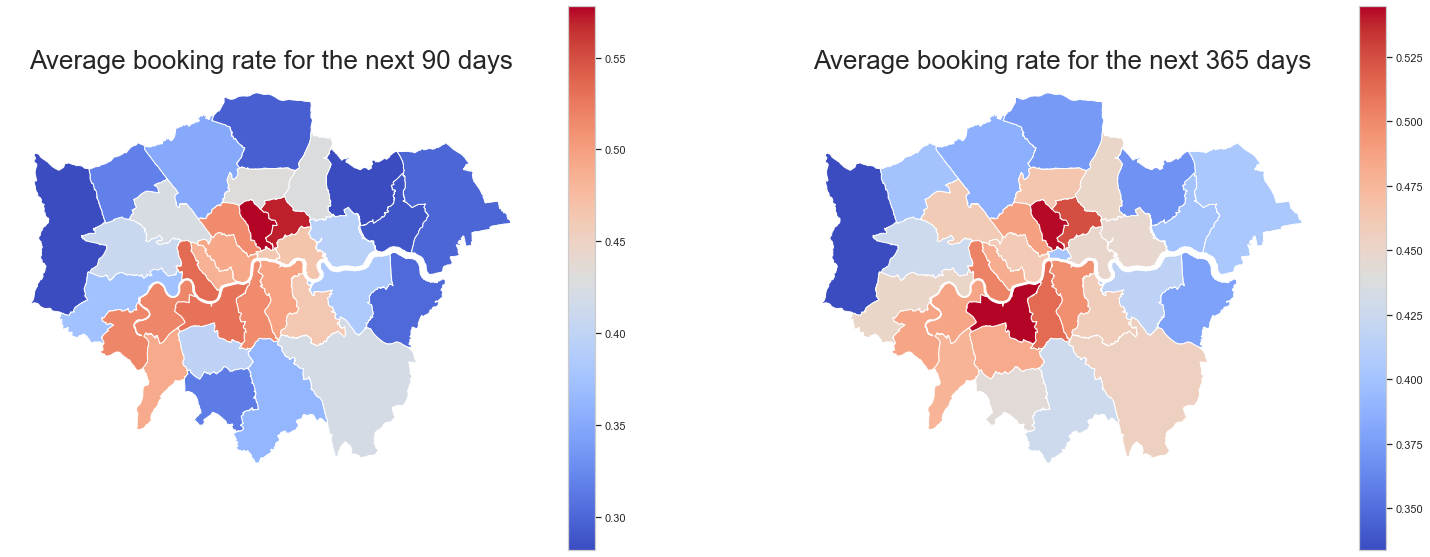

In [48]:
gdf_ava_gr_all = gdf_ava_gr_all.set_geometry('geometry')

f,axes = plt.subplots(1,2,figsize=(26,10))

gdf_ava_gr_all.plot(column='Occupancy_rate_90', ax=axes[0], legend=True, cmap='coolwarm')
gdf_ava_gr_all.copy().plot(column='Occupancy_rate_365', ax=axes[1], legend=True, cmap='coolwarm')

for ax in axes:
    ax.axis('off')

axes[0].set_title('Average booking rate for the next 90 days', size=26)
axes[1].set_title('Average booking rate for the next 365 days', size=26)
plt.savefig("results/Booking_rate_2.jpg")